# GRIP:-The Spark Foundation

# Project_Task_04

# Aurthor:-Sandeep Khandelwal

# Exploratory Data Analysis - Terrorism


In [1]:
#importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df=pd.read_csv('globalterrorism.csv',encoding = "ISO-8859-1")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
#Seleting some columns and renaming them 
df.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'countrys','region_txt':'regions','provstate':'state',
                    'attacktype1_txt':'attack','targtype1_txt':'target','gname':'name','weaptype1_txt':'weapon',
                  'nwound':'wound','nkill':'kill'},inplace=True)

In [5]:
#Seletion IMportant features for analysis
df=df[['year','month','day','countrys','regions','state','city','latitude','longitude',
       'attack','kill','wound','summary','name','weapon','target','motive']]

In [6]:
df.head()

,year,month,day,countrys,regions,state,city,latitude,longitude,attack,kill,wound,summary,name,weapon,target,motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,NaN,MANO-D,Unknown,Private Citizens & Property,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,NaN,23rd of September Communist League,Unknown,Government (Diplomatic),NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1.0,0.0,NaN,Unknown,Unknown,Journalists & Media,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,Unknown,Explosives,Government (Diplomatic),NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,Unknown,Incendiary,Government (Diplomatic),NaN


In [7]:
#checking the shape 
df.shape

(181691, 17)

In [8]:
#checking teh dimension
df.ndim

2

In [9]:
#checking the Data-Type
df.dtypes

year           int64
month          int64
day            int64
countrys      object
regions       object
state         object
city          object
latitude     float64
longitude    float64
attack        object
kill         float64
wound        float64
summary       object
name          object
weapon        object
target        object
motive        object
dtype: object

In [10]:
#checking teh info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       181691 non-null  int64  
 1   month      181691 non-null  int64  
 2   day        181691 non-null  int64  
 3   countrys   181691 non-null  object 
 4   regions    181691 non-null  object 
 5   state      181270 non-null  object 
 6   city       181257 non-null  object 
 7   latitude   177135 non-null  float64
 8   longitude  177134 non-null  float64
 9   attack     181691 non-null  object 
 10  kill       171378 non-null  float64
 11  wound      165380 non-null  float64
 12  summary    115562 non-null  object 
 13  name       181691 non-null  object 
 14  weapon     181691 non-null  object 
 15  target     181691 non-null  object 
 16  motive     50561 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


## Inferance :--Dataset Contains some missing values.

In [11]:
#checking the Uniuqe Values
df.nunique().sort_values(ascending=False)

summary      112492
latitude      48322
longitude     48039
city          36674
motive        14490
name           3537
state          2855
wound           238
kill            205
countrys        205
year             47
day              32
target           22
month            13
weapon           12
regions          12
attack            9
dtype: int64

In [12]:
#checking null or NA Values
df.isnull().sum().sort_values(ascending=False)

motive       131130
summary       66129
wound         16311
kill          10313
longitude      4557
latitude       4556
city            434
state           421
name              0
weapon            0
attack            0
target            0
regions           0
countrys          0
day               0
month             0
year              0
dtype: int64

### Inferance:--Dataset Contains so many NA or Null Values.

In [13]:
#filling na values in wound & kill
df['wound']=df['wound'].fillna(0)
df['kill']=df['kill'].fillna(0)

In [14]:
#creating new variable
df['Casulity']=df['kill']+df['wound']

In [15]:
df.head()

,year,month,day,countrys,regions,state,city,latitude,longitude,attack,kill,wound,summary,name,weapon,target,motive,Casulity
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,NaN,MANO-D,Unknown,Private Citizens & Property,NaN,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,NaN,23rd of September Communist League,Unknown,Government (Diplomatic),NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1.0,0.0,NaN,Unknown,Unknown,Journalists & Media,NaN,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,NaN,Unknown,Explosives,Government (Diplomatic),NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,NaN,Unknown,Incendiary,Government (Diplomatic),NaN,0.0


In [16]:
#checking the Numrical values
df.describe()

,year,month,day,latitude,longitude,kill,wound,Casulity
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


### Inference :--Dataset contains Outliers.

In [17]:
#checking Duplicates in the Data
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
181686    False
181687    False
181688    False
181689    False
181690    False
Length: 181691, dtype: bool

### Inferance :-There is no Duplicate Values in Data

# Data Visulization

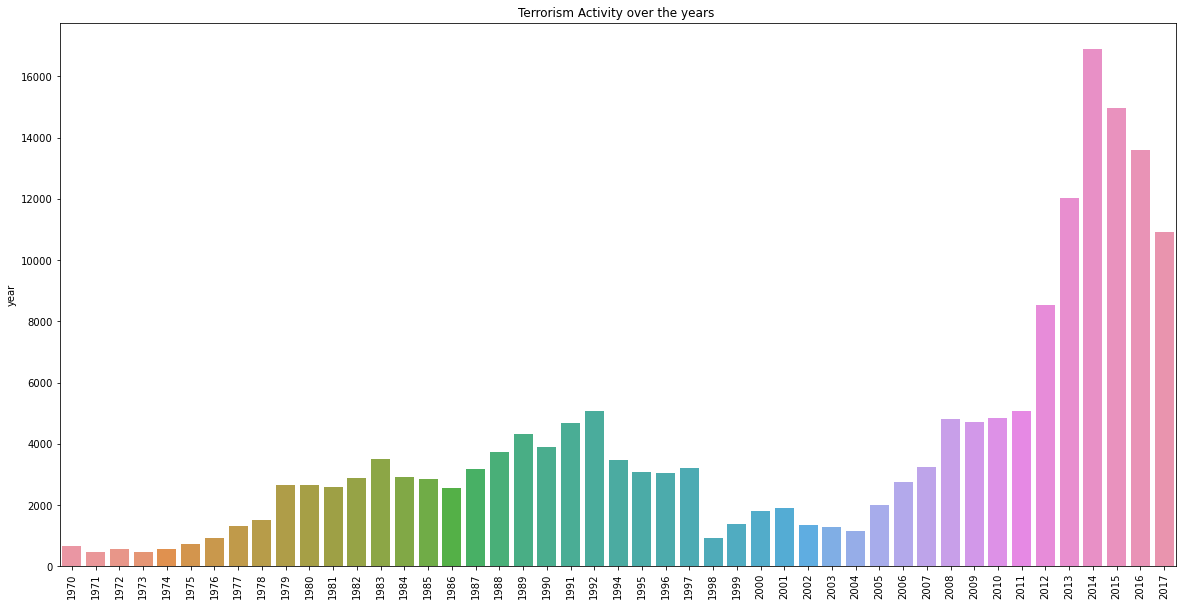

In [18]:
# Terrorism Activity over the years 
Years=df['year'].unique()
year_count=df['year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(20,10))
sns.barplot(x=Years,y=year_count,data=df)
plt.xticks(rotation=90)
plt.title('Terrorism Activity over the years ')
plt.show()

### Inferance :--In 2014 Terrorism Activity were very high.

In [19]:
df['countrys'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: countrys, dtype: int64

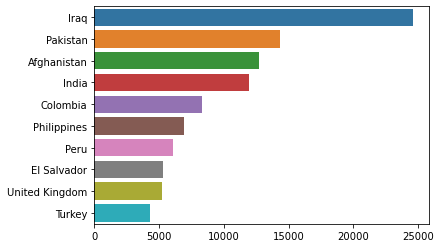

In [20]:
x=df['countrys'].value_counts().values[:10]
y=df['countrys'].value_counts().index[:10]
sns.barplot(x,y)
plt.show()

### Inferance:--In Countries -Iraq has Maximum terrorist attacks.

In [21]:
df['state'].value_counts().head(10)

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: state, dtype: int64

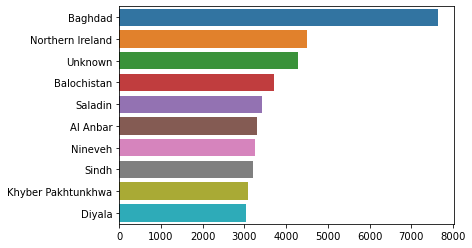

In [22]:
x=df['state'].value_counts().values[:10]
y=df['state'].value_counts().index[:10]
sns.barplot(x,y)
plt.show()

### Inferance:--StateWise Baghdad has Maximum terrorist attacks.

In [23]:
df['city'].value_counts().head(10)

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64

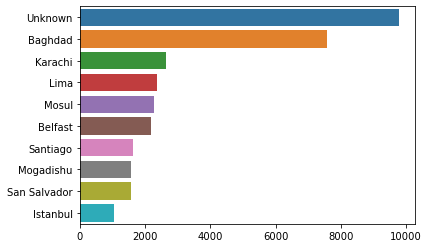

In [24]:
x=df['city'].value_counts().values[:10]
y=df['city'].value_counts().index[:10]
sns.barplot(x,y)
plt.show()

### Inferance:--CityWise Unknown & Baghdad has Maximum terrorist attacks.

In [25]:
df['regions'].value_counts().head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: regions, dtype: int64

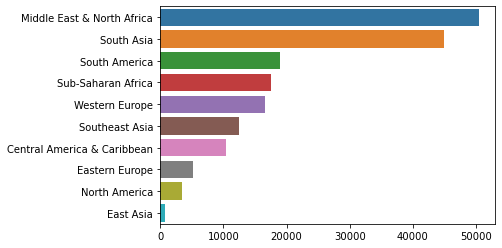

In [26]:
x=df['regions'].value_counts().values[:10]
y=df['regions'].value_counts().index[:10]
sns.barplot(x,y)
plt.show()

### Inferance:--RegionWise Middle East & North Africa has Maximum terrorist attacks.

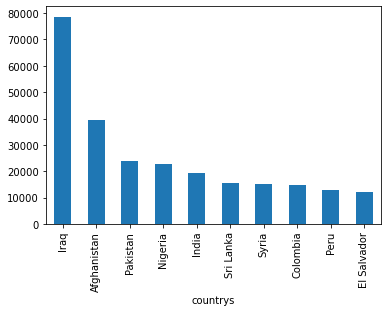

In [27]:
df.groupby('countrys')['kill'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

### Inferance :--In Iraq Maximum people were killed

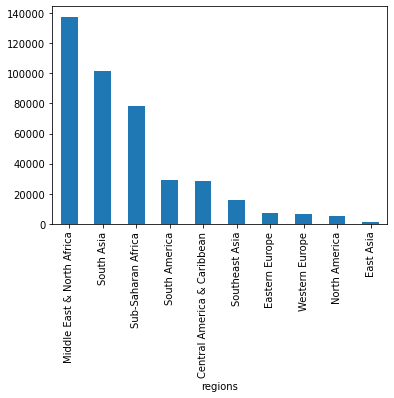

In [28]:
df.groupby('regions')['kill'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

### Inferance :--In Middle East & North Africa Maximum people were killed

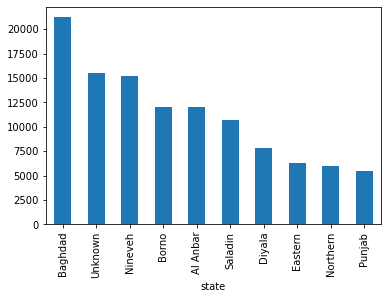

In [29]:
df.groupby('state')['kill'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

## Inferance :--In Baghdad Maximum people were killed

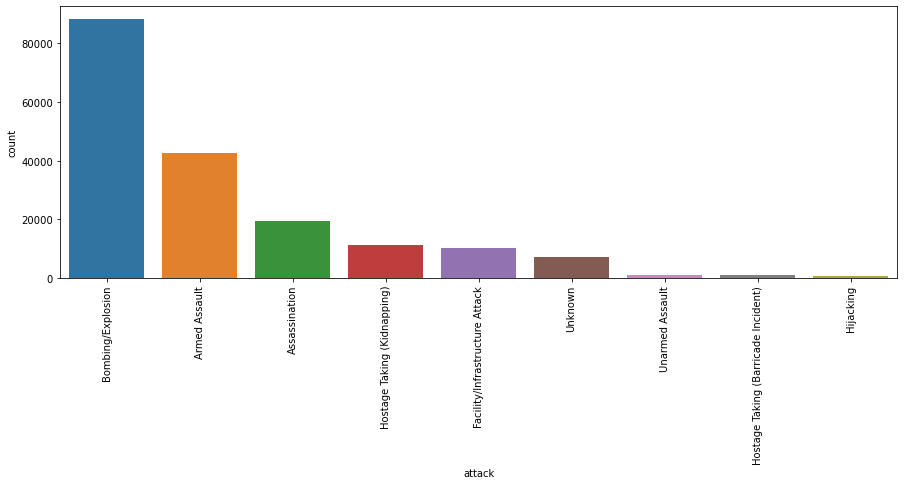

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(df['attack'],order=df['attack'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### Inferance:--  Maximum attack were executed using Bombing/Explosion

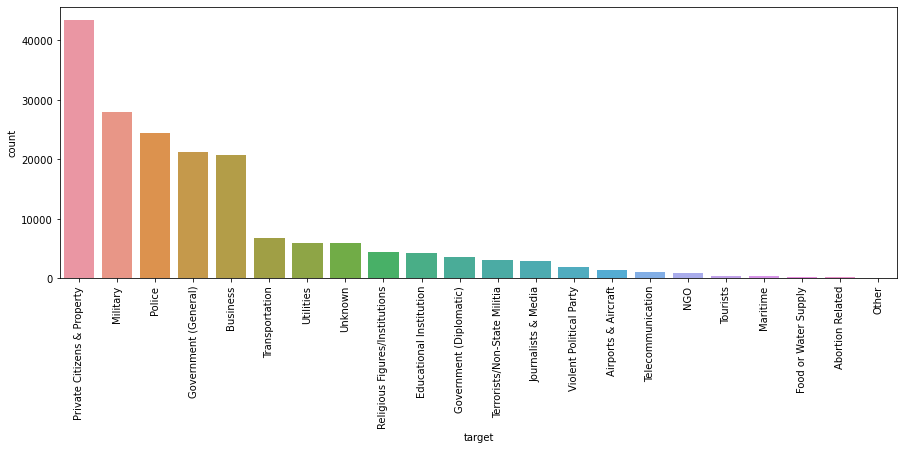

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(df['target'],order=df['target'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### Inferance:--  Maximum attack were executed on Private Citizens & property

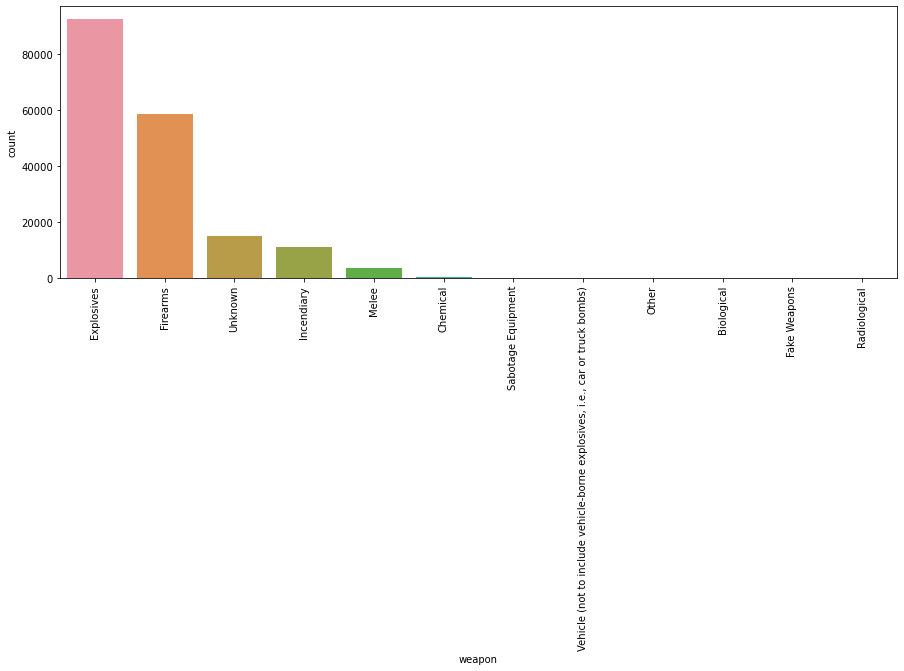

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(df['weapon'],order=df['weapon'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### Inferance:--  Maximum attack were executed using Explosives

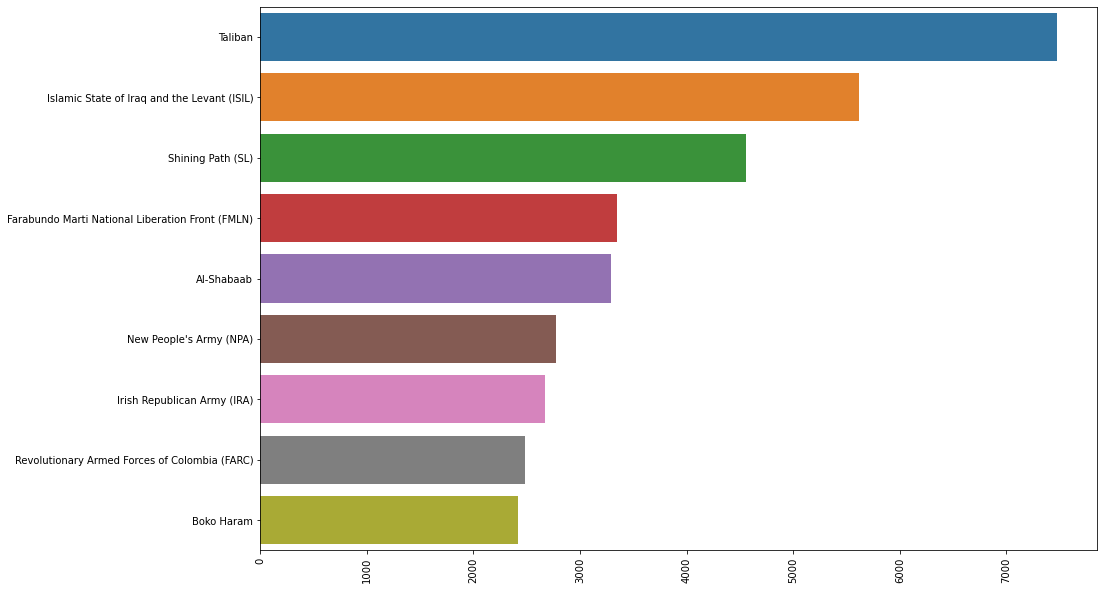

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(df['name'].value_counts()[1:10].values,df['name'].value_counts()[1:10].index)
plt.xticks(rotation=90)
plt.show()

## Inferance :- Terrorsim Gorup Name "Taliban" has maximum records to Attack all over.

In [34]:
group_country=df.groupby('countrys')
India=group_country.get_group('India')

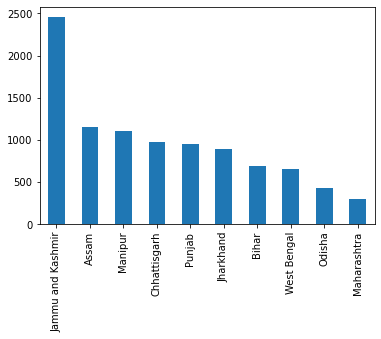

In [35]:
India['state'].value_counts().head(10).plot(kind='bar')
plt.show()

### Inferance:--In India  State Jammu & Kashmir where max attacks happened.

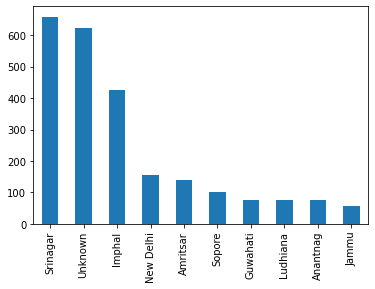

In [36]:
India['city'].value_counts().head(10).plot(kind='bar')
plt.show()

### Inferance:--In India City Sirnagar  where max attacks happened.

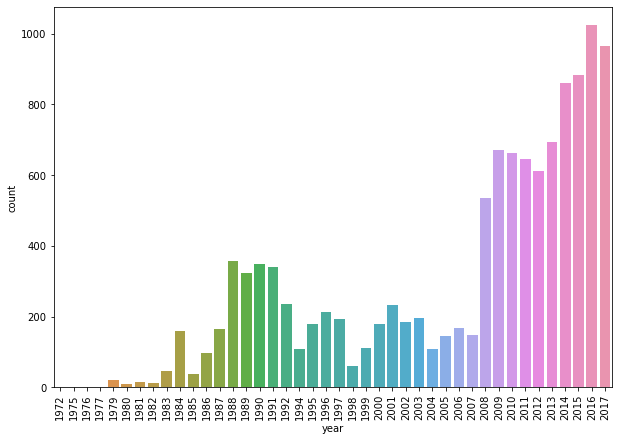

In [37]:
plt.figure(figsize=(10,7))
sns.countplot(India['year'])
plt.xticks(rotation=90)
plt.show()

### Inferance:--In Year 2016 max attachs happened

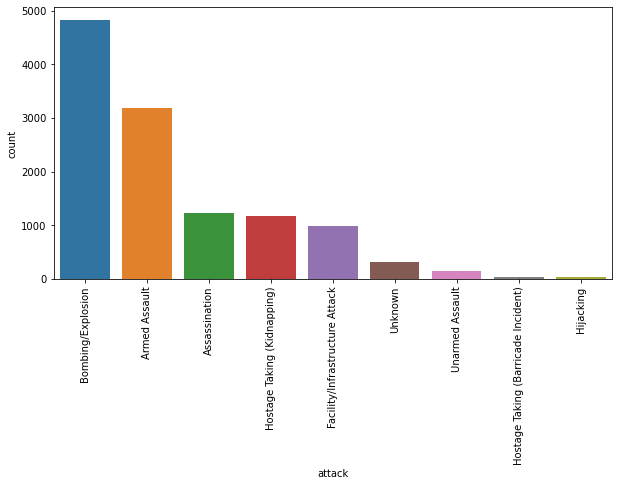

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(India['attack'],order=India['attack'].value_counts(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

### Inferance:--In India maximum attack happened using Bombing/Explosion

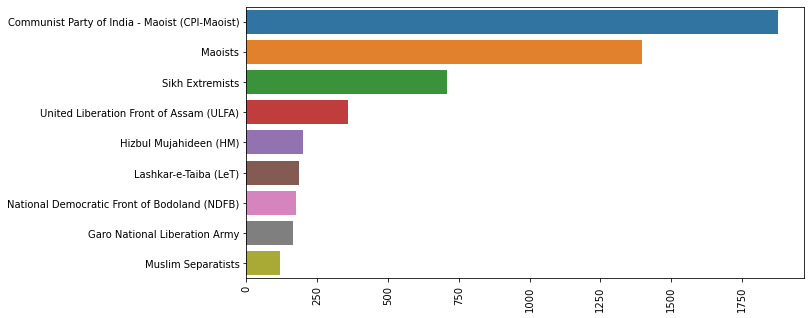

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(India['name'].value_counts()[1:10].values,India['name'].value_counts()[1:10].index)
plt.xticks(rotation=90)
plt.show()

## Inferance:--In India maximum attack are made by Communist party of India-Maoist(CPI=Maoist)

# Conclusion

### 1) Most of the Attacks happen in 2014

### 2)Middle East & North Africa has been through max number of attacks

### 3)Maximum attacks are happened or done by using Bombing/Explosives